### Once the cores for the matrix product state is obtained DMRG for the variational Hamiltonian defined by the covariance matrix "Borealis_M72_sq_cov.npy", the following can be carried out:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import thewalrus as tw

In [6]:
cov = np.load("Borealis_M72_sq_cov.npy")
N = 72

configs = ['0'*N]
for i in range(N-1):
    string = i*'0'+'1'
    for j in range(N-i-1):
        configs.append(string + j*'0'+'1'+'0'*(N-j-i-2))

In [20]:
# import quimb.tensor as qtn
# cores = load(...)
# MPS = qtn.MatrixProductState(*[cores])
# amps = [MPS.amplitude(conf) for conf in configs]
# Amps = np.abs(np.asarray(amps))

Amps = [0]*len(configs)

In [7]:
twamps = [tw.quantum.pure_state_amplitude(np.zeros(2*N),cov,list(map(int, list(conf)))) for conf in configs]
twAmps = np.abs(np.asarray(twamps))

/tmp/ipykernel_511025/2947700561.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["0.06","0.04","0.02","0","0.02","0.04","0.06"])


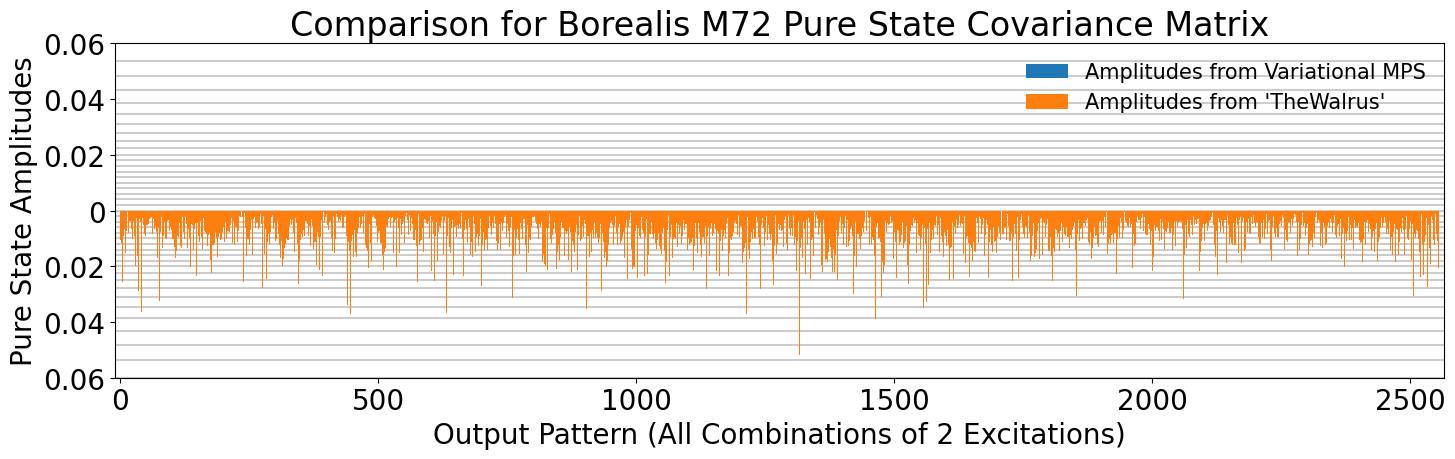

In [ ]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(np.arange(len(configs)-1),Amps[1:],width=1,label="Amplitudes from Variational MPS")
ax.bar(np.arange(len(configs)-1),-twAmps[1:],width=1,label="Amplitudes from 'TheWalrus'")

ax.set_xlabel("Output Pattern (All Combinations of 2 Excitations)")
ax.set_ylabel("Pure State Amplitudes")
ax.set_xlim(-10,len(twAmps[1:])+10)
ax.set_title("Comparison for Borealis M72 Pure State Covariance Matrix")
ax.legend(frameon=False,fontsize=15)

ax.hlines(np.linspace(-0.02,0.02,21),-10,len(twAmps[1:])+10,linestyles='-',zorder=-1,color='k',alpha=0.2)
ax.hlines(np.logspace(np.log10(0.02),np.log10(0.06),11)[1:],-10,len(twAmps[1:])+10,linestyles='-',zorder=-1,color='k',alpha=0.2)
ax.hlines(-np.logspace(np.log10(0.02),np.log10(0.06),11)[1:],-10,len(twAmps[1:])+10,linestyles='-',zorder=-1,color='k',alpha=0.2)
ax.set_ylim(-0.06,0.06)
ax.set_yticklabels(["0.06","0.04","0.02","0","0.02","0.04","0.06"])
fig.tight_layout()